# Titanic - Machine Learning from Disaster

Легендарное ML-соревнование с [Kaggle](https://www.kaggle.com/c/titanic)

<img src='./Titanic.jpg' width=500>

Возможно, гибель Титаника - одно из самых печально известных кораблекрушений в истории. Титаник был крупнейшим действующим океанским лайнером своего времени, у него были улучшенные меры обеспечения безопасности, такие как водонепроницаемые отсеки и водонепроницаемые двери с дистанционным управлением. Корабль считался «непотопляемым», однако он затонул рано утром 15 апреля 1912 года в северной части Атлантического океана во время своего первого рейса из Саутгемптона в Нью-Йорк. В момент столкновения корабля с айсбергом на борту находились 2224 человека.

В соответствии с существующей в то время практикой система спасательных шлюпок Титаника была разработана для переправки пассажиров на ближайшие спасательные суда, а не для одновременного удержания всех на плаву. Таким образом, когда корабль быстро тонул (корабль затонул за 2 часа 40 минут), а до прибытия помощи оставалось еще несколько часов, многим пассажирам и членам экипажа не хватило места на спасательных шлюпках, которых было всего 20. Плохая организация эвакуации привела к тому, что многие лодки были спущены на воду до того, как были полностью заполнены.

В результате кораблекрушения погибло более 1500 человек, что сделало его одним из самых смертоносных в истории.

Без сомнения, при спасении пассажиров имел место элемент удачи, но, возможно, были те, кто имели большие шансы уцелеть чем другие. [Titanic ML competition on Kaggle](https://www.kaggle.com/c/titanic) предлагает участникам предсказать кто из пассажиров пережил кораблекрушение, основываясь на сохранившихся данных о пассажирах.

В Интернете можно найти десятки статей, посвященных этому соревнованию, и сотни решений этой задачи. В исследовательском анализе я во многом ориентировался на [эту статью](https://habr.com/ru/company/mlclass/blog/270973/) и позаимствовал из неё несколько идей.

**Примечание**

Терадка состоит из нескольких этапов, некоторые из которых могут занимать продолжительное время, поэтому будем использовать логирование с помощью библиотеки `notifiers` и чатбота в телеграм.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-модулей-и-константы" data-toc-modified-id="Импорт-модулей-и-константы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт модулей и константы</a></span></li><li><span><a href="#Настройка-логирования" data-toc-modified-id="Настройка-логирования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Настройка логирования</a></span></li><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Примечания-к-признкакм" data-toc-modified-id="Примечания-к-признкакм-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Примечания к признкакм</a></span></li><li><span><a href="#Пути-к-файлам" data-toc-modified-id="Пути-к-файлам-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Пути к файлам</a></span></li><li><span><a href="#Предположения" data-toc-modified-id="Предположения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Предположения</a></span></li><li><span><a href="#Анализ-таблицы-с-результатами-соревнований" data-toc-modified-id="Анализ-таблицы-с-результатами-соревнований-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Анализ таблицы с результатами соревнований</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Разделения-на-тестовый-и-тренировочный-наборы" data-toc-modified-id="Разделения-на-тестовый-и-тренировочный-наборы-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Разделения на тестовый и тренировочный наборы</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Базовая-модель" data-toc-modified-id="Базовая-модель-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Базовая модель</a></span></li><li><span><a href="#Подготовка-результатов-для-Kaggle" data-toc-modified-id="Подготовка-результатов-для-Kaggle-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Подготовка результатов для Kaggle</a></span></li></ul></div>

## Импорт модулей и константы

In [1]:
from category_encoders.target_encoder import TargetEncoder

from joblib import Parallel, delayed, dump, load

import optuna

import pandas as pd

import seaborn as sns

from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import (mutual_info_classif,
                                       SelectKBest,
                                      )

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     train_test_split,
                                    )

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import (Binarizer, 
                                   FunctionTransformer, 
                                   KBinsDiscretizer, 
                                   StandardScaler,
                                  )

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from useful_funcs import *

from xgboost import XGBClassifier


CV = 10
N_JOBS = -1
N_OPTIMIZATIONS = 50
N_TRIALS = 100
SEED = 42


%matplotlib inline

## Настройка логирования

In [2]:
set_notification = make_notifier()

In [3]:
set_notification('Titanic - Machine Learning from Disaster\n\nМодули импортированы.\nЛогирование настроено.')

## Описание проекта

**Цель** - предсказать выживет пассажир Тинтаника в кораблекрушении или нет.

**Тип задачи** - классификация (бинарная классификация).

**Целевая метрика** - *accuracy* (точность).

**Желаемое значение целевой метрики:** Табилца с результатами соревнований содержит почти 14000 записей. 
Медианное значение точности 0.775, но менее 4% имеют резутат выше 0.8. 
Таким образом, **значение метрики accuracy больше или равное 0.8 будет отличным результатом**.

**Существующие решения:** имеется огромное количество решений опубликованных в интернете и [на форуме](https://www.kaggle.com/c/titanic/discussion)

## Описание данных
0. **PassengerId** - ID пассажира.
1. **Survived** - Выживший:
    - 0 = Нет, 
    - 1 = Да.
2. **Pclass** - Класс билета:
    - 1 = первый, 
    - 2 = второй, 
    - 3 = третий.
3. **Name** - Имя пассажира, например Braund, Mr. Owen Harris.
4. **Sex** - Пол:
    - male - мужчина,
    - female - женщина.
5. **Age** - Возраст в годах, например 38.0.
6. **SibSp** - Количество братьев и сестер или супругов на борту Титаника.
7. **Parch** - Количество родителей или детей на борту Титаника.
8. **Ticket** - Номер билета, например A/5 21171.
9. **Fare** - Стоимость билета, например 71.2833.
10. **Cabin** - Номер каюты, напрмер C85.
11. **Embarked** - Порт, где пассажир сел на корабль:
    - C = Cherbourg,
    - Q = Queenstown,
    - S = Southampton.
    
**Признаки:** PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket,
Fare, Cabin, Embarked

**Целевой признак** - Survived
    
## Примечания к признкакм
- **pclass**: социально-экономический статус
    - *1st* = Upper
    - *2nd* = Middle
    - *3rd* = Lower
- **age**: Возраст представлен дробным значением, если он меньше 1 года. Если возрас известен, то значение имеет вид xx.5.
- **sibsp**: Количество братьев и сестер или супругов на борту Титаника
    - *sibling* = брат, сестра, сводный брат, сводная сестра
    - *spouse* = муж, жена (любовницы, женихи и невесты игнорировались)
- **parch**: количество родителей (мать, отец)/детей (дочь, сын, в т.ч. приёмные) на борту Титаника. Некоторые дети путешествовали только с няней, поэтому для них parch=0.

## Пути к файлам
- **training set**: ../datasets/train.csv - набор данных для обучения модели.
- **test set**: ../datasets/test.csv - набор для подготовки предсказания для отправки на проверку.
- **example of a submission file**: ../datasets/gender_submission.csv - пример данных, подготовленных для проверки. В нём значения целевой переменной расставлены случайным образом.

## Предположения
У женщин было больше шансов выжить, чем у мужчин.

## Анализ таблицы с результатами соревнований
Скачаем [таблицу с результатами соревнования](https://www.kaggle.com/competitions/titanic/leaderboard) и проанализируем результаты в ней. Таблица загружена 04.02.2023.

Выведем первые 5 строк таблицы.

In [4]:
leaderboard = pd.read_csv('../datasets/titanic-publicleaderboard.csv')
leaderboard.head()

,TeamId,TeamName,SubmissionDate,Score
0,221819,https://bit.ly/TryPrevisionIO,2022-12-06 07:04:39,1.0
1,9577831,DANUSHKUMAR. V,2022-12-06 15:05:10,1.0
2,7943932,Aleksei Fomin,2023-01-28 09:24:51,1.0
3,9583552,sdg888,2022-12-07 16:17:33,1.0
4,9584744,TJ Carpenter,2022-12-08 17:28:28,1.0


Неожиданно в начале таблицы оказались результаты с точностью (метрика *accuracy*) равной 1. Неужели авторы смогли достичь совершенства?

Посчитаем описательные статистики для результатов приведённых в таблице (столбец `Score`).

In [5]:
leaderboard.Score.describe()

count    14118.000000
mean         0.759704
std          0.078944
min          0.000000
25%          0.765550
50%          0.775110
75%          0.777510
max          1.000000
Name: Score, dtype: float64

Посчитаем процент участников показавших результат лучше 0.8.

In [6]:
print(f'Только {1 - percentileofscore(leaderboard.Score, 0.8) / 100 :.2%} участников показали результат лучше 0.8')

Только 3.24% участников показали результат лучше 0.8


Таким образом, **значение метрики accuracy больше или равное 0.8 будет отличным результатом**.

Построим функцию распределения (ECDF) вероятности результатов участников. Красным отметим желаемое значение целевой метрики.

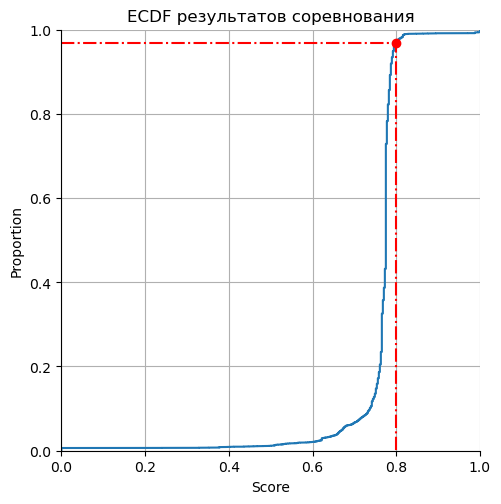

In [7]:
plot_ecdf_with_target(leaderboard.Score, 0.8)

Построим плотность распределения вероятности получения определённого результата соревнования. Красной стрелкой отметим результаты равные 1.0 .

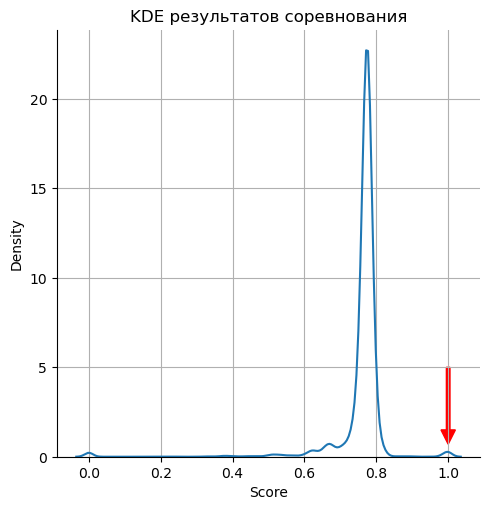

In [8]:
sns.displot(leaderboard, x='Score', kind='kde')

plt.arrow(x=1.0, y=5, dx=0, dy=-3.5, width=0.01, head_width=0.04, head_length=0.8, color='r')
plt.title("KDE результатов соревнования")
plt.grid()

plt.show()

Возможно, решения с "совершенным" результатом появились из-за того, что на [GitHub](https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv) есть точное решение задачи соревнования. Вполен возможно, что выложены данные, извлечённые из [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-survivors/) или из [OpenML](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active).

Некоторые авторы в своих тетрадках честно предупреждают других пользователей о наличии такой возможности, например [вот этот](https://www.kaggle.com/code/suzukifelipe/how-to-be-a-top-lb-explained-for-beginners/notebook?scriptVersionId=99817039).

Приступим к решению задачи.

In [9]:
set_notification('Выполнен анализ таблицы с результатами соревнования.')

## Загрузка данных
Загрузим набор данных для разработки модели. Далее будем работать с этим набором данных.

In [10]:
data = pd.read_csv('../datasets/train.csv')

Загрузим набор признкаов для отправки результатов на проверку. Отложим этот набор.

In [11]:
submission_X = pd.read_csv('../datasets/test.csv')

In [12]:
set_notification('Выполнена загрузка данных.')

## Знакомство с данными
Выведем форму датасета.

In [13]:
print(f'Датасет содержит {data.shape[0]} строку и {data.shape[1]} столбцов.')

Датасет содержит 891 строку и 12 столбцов.


Выведем на экран первые 10 строк датасета

In [14]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Проверим типы данных признаков и наличие пропусков

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Столбцы `Age`, `Cabin`, `Embarked` содержат пропуски, причём, в столбце `Cabin` пропусков большинство.

Проверим есть ли дисбаланс классов целевой переменной.

In [16]:
check_target_imbalance(data.Survived)

Доля выживших пассажиров -  38.38%
Доля погибших пассажиров -  61.62%


В датасете есть дисбаланс классов, поэтому будем использовать стратификацию при разделении на тренировочный и тестовый наборы. Дисбаланс небольшой, и он, скорее всего, отражает объективную реальность, а не является результатом несовершенства сбора данных, поэтому пока оставим его как есть. 

Конечно, может оказаться, что применение какой-либо техники для борьбы с дисбалансом, например апсемплинга, может привести к улучшению результатов.

Проверим наличие дубликатов в наборе данных.

In [17]:
if data.duplicated().any():
    print('В данных есть дубликаты!')
else:
    print('Дубликаты не обнаружены.')

Дубликаты не обнаружены.


In [18]:
set_notification('Выполнено знакомство с данными.')

## Разделения на тестовый и тренировочный наборы
Чтобы обучить модель и спрогнозировать точность её предсказаний на новых данных (результат соревнования) необходимо разделить данные на тестовый и тренировочный наборы. При разделении будем делать стратификацию по целевому признаку.

In [19]:
X = data.drop(columns = 'Survived')
y = data.Survived.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

Проверим дисбаланс классов в тренировочной выборке

In [20]:
check_target_imbalance(y_train)

Доля выживших пассажиров -  38.34%
Доля погибших пассажиров -  61.66%


Проверим дисбаланс классов в тестовой выборке

In [21]:
check_target_imbalance(y_test)

Доля выживших пассажиров -  38.55%
Доля погибших пассажиров -  61.45%


Пропорции приблизительно одинаковые.

In [22]:
set_notification('Данные разделены на тестовый и тренировочный наборы.')

Сохраним тренировочный набор для использования в других тетрадках.

In [23]:
dump(
    value=(X_train, y_train),
    filename='train_set.joblib'
)

['train_set.joblib']

Сохраним тестовый набор для использования в других тетрадках.

In [24]:
dump(
    value=(X_test, y_test),
    filename='test_set.joblib'
)

['test_set.joblib']

## Исследовательский анализ

Исследовательский анализ данных собран в отдельной [тетрадке](EDA.ipynb).

**Ниже повторим основные выводы из исследовательского анализа:**
1. Присутствует дисбаланс классов
1. Требуется кодирование категориальных признаков
1. Требуется удаление неинформативных признаков
1. Требуется обработка пропусков
1. Требуется стандартизация данных
1. К исследовательскому набору были добавлены новые признаки, информативность которых еще предстоит оценить:
    - `Title`
    - `AgeGroup`
    - `Family`
    - `isFamily`
    - `FareGroup`
    - `Cabin`
    - `Ticket`
1. Возможно наличие корреляции между добавленными и имевшимися признаками

На первый взгляд, очень важными признаками являются класс билета `Pclass` и пол `Sex` пассажира. Могут оказаться полезны признаки `Title`, `AgeGroup`, `isFamily`. Возможно, окажутся информативны `FareGroup` и `isCabin`. Проверим это предположение после обработки данных.

Отметим что женщины имели более высокие шансы спастись, чем мужчины, и что в данных нет явных сведений о том, что более молодые пассажиры имели больше шансов выжить, однако, может оказаться, что некоторые возрастные группы имели больше шансов спастись.

## Базовая модель

В качестве базовой модели выбран `XGBClassifier` с предварительной обработкой данных, подробнее в [тетрадке](Baseline.ipynb). 

Для базовой модели среднее значение метрики `accuracy` на кросс-валидации приблизительно равно **0.834**. На тестовом множестве `accuracy` приблизительно равно **0.777**. Модель демонстрирует **небольшой оверфитинг** и показывает результат сравнимый с результатом логистической регрессии.

Будем стараться улучшить полученный результат, при этом больше не будем обращаться к тестовому множеству, пока не получим финальную модель, чтобы избежать излишней адаптации под тестовый набор.

## Подготовка результатов для Kaggle
Подготовим данные для отправки на Kaggle.

```Python
model.fit(X, y)

display(submission_X.head())

submission_y = model.predict(submission_X)


submission = pd.DataFrame({'PassengerId': submission_X.PassengerId,
                           'Survived': submission_y,
                          }
                         )

display(submission.head())


submission.to_csv('submission.csv', index=False)
```

```Python
set_notification('Подготовлены данные для отправки на Kaggle.')
```

После отправки платформа сообщила о следующем результате:
![Результат на Kaggle](scores_on_kaggle.PNG)

Довольно скромный результат, возможно, однажды его получится улучшить :)